In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Customer_Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

C:\Users\91821\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

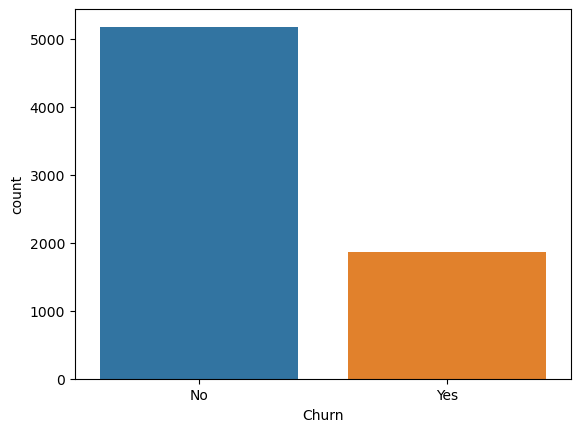

In [11]:
sns.countplot(data.Churn)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
obj_col=data.select_dtypes(include="object")
obj_col

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [14]:
obj_col2=obj_col.drop(columns="customerID")

In [15]:
obj_col2

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [16]:
label=LabelEncoder()

In [17]:
for col in obj_col2:
    data[col]=label.fit_transform(data[col])

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [19]:
data["PaymentMethod"].value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

In [20]:
data["PaymentMethod"].unique()

array([2, 3, 0, 1])

In [21]:
data["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [22]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1
7042,3186-AJIEK,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,5407,0


In [23]:
scaler=StandardScaler()

In [24]:
data["TotalCharges"]=scaler.fit_transform(data["TotalCharges"].values.reshape(-1,1))

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,-0.398608,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,-0.948762,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,-1.641883,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,-0.983710,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,-1.235224,1


In [26]:
columns=data.columns.tolist()
columns.remove("customerID")
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

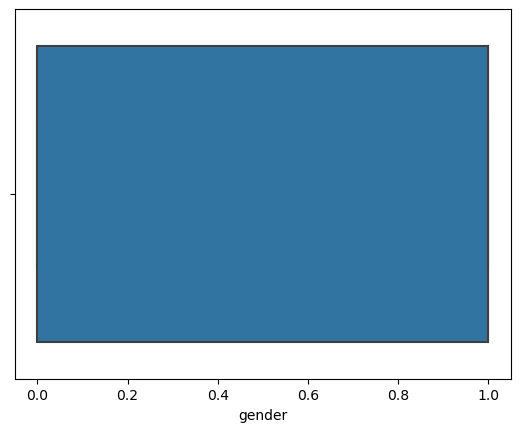

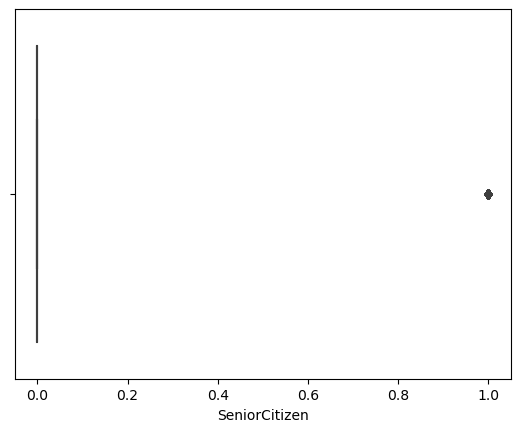

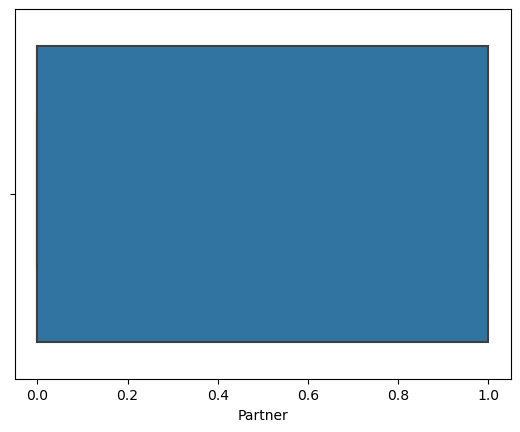

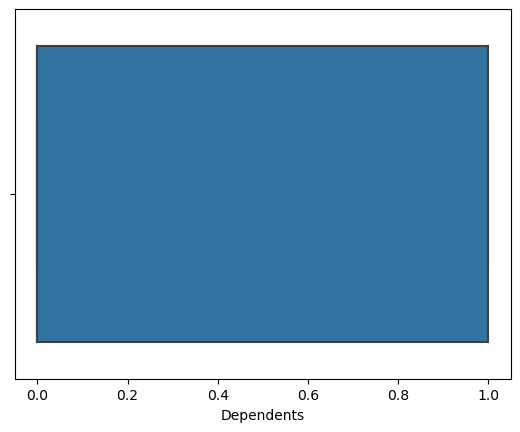

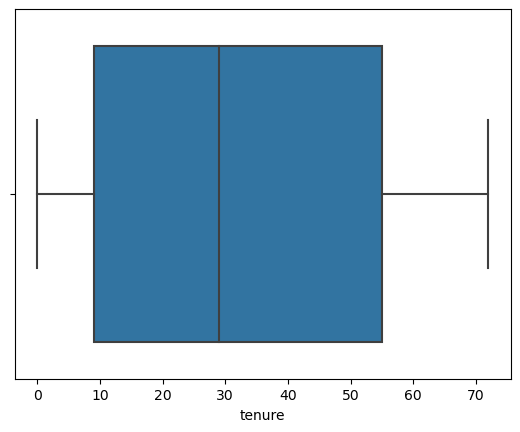

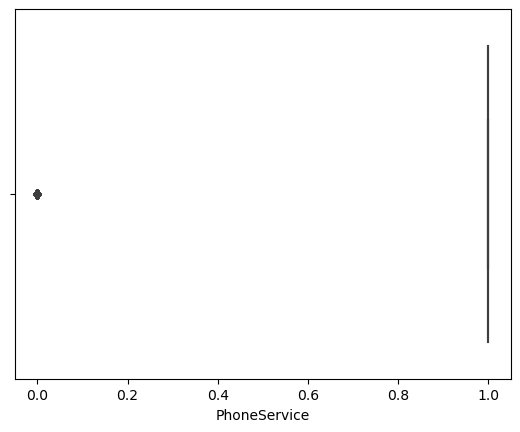

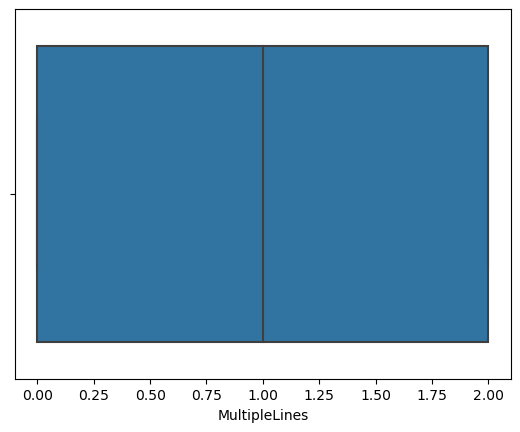

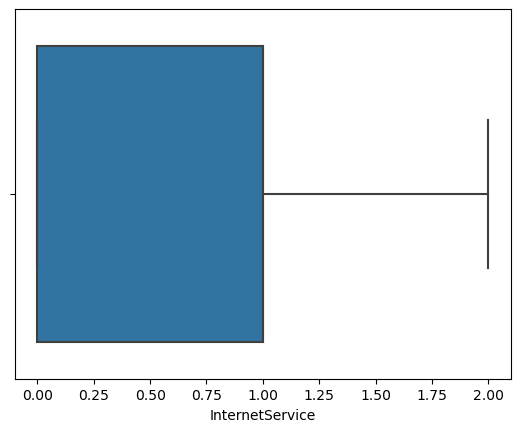

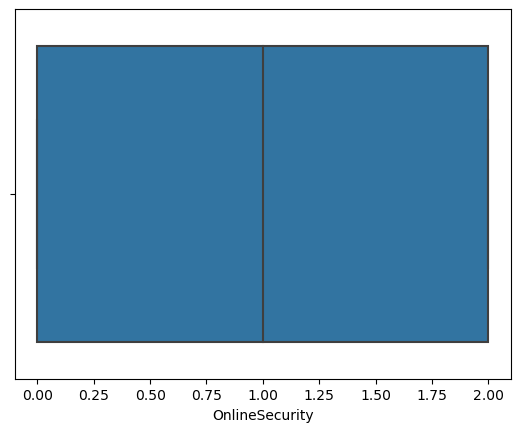

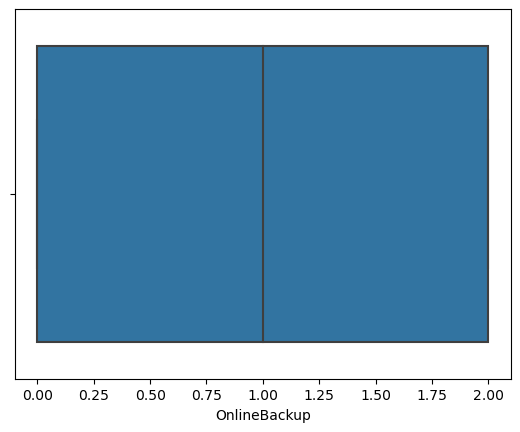

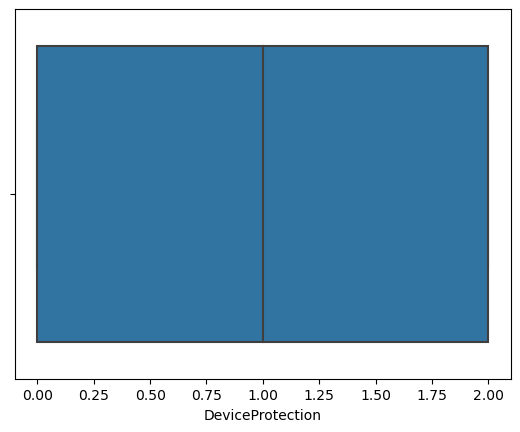

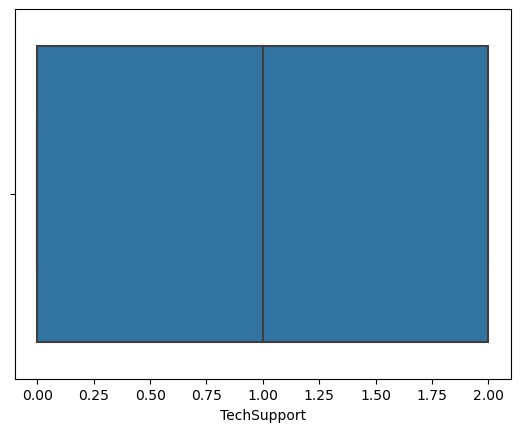

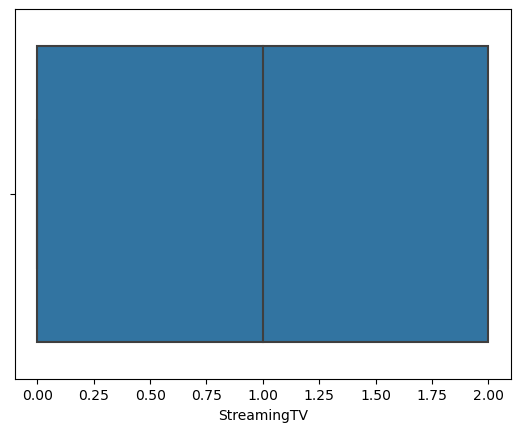

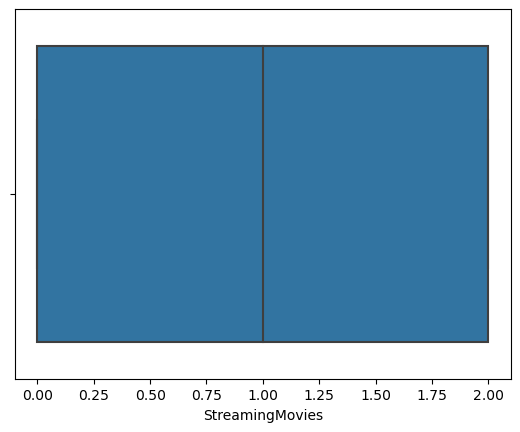

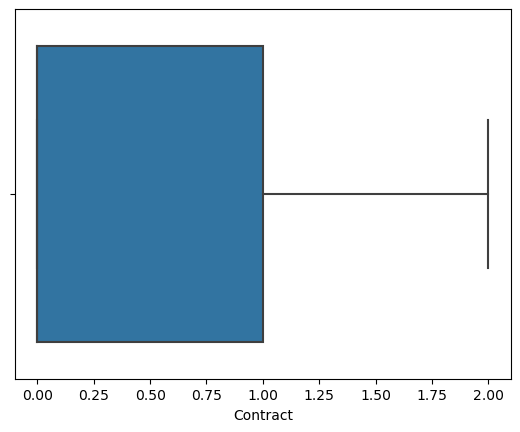

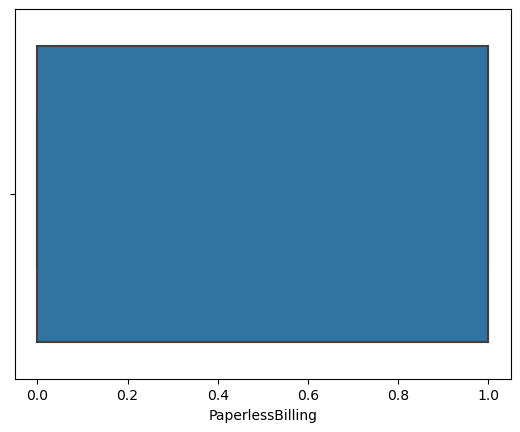

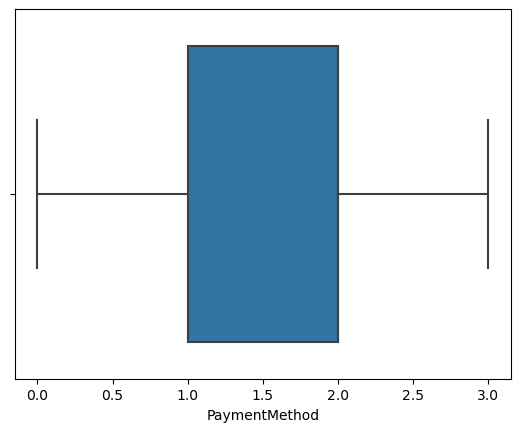

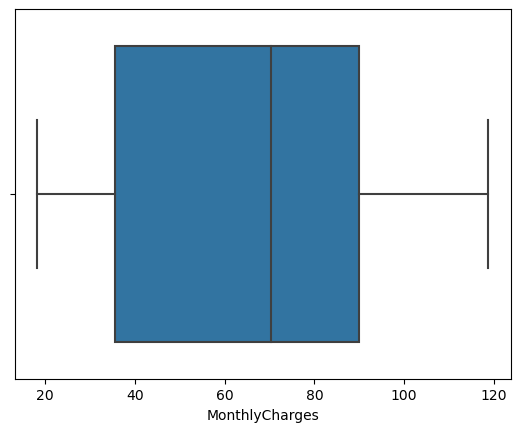

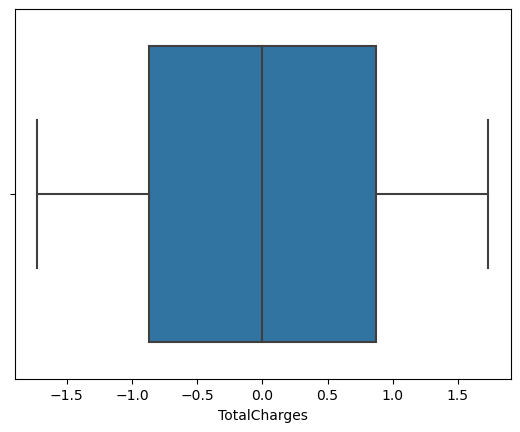

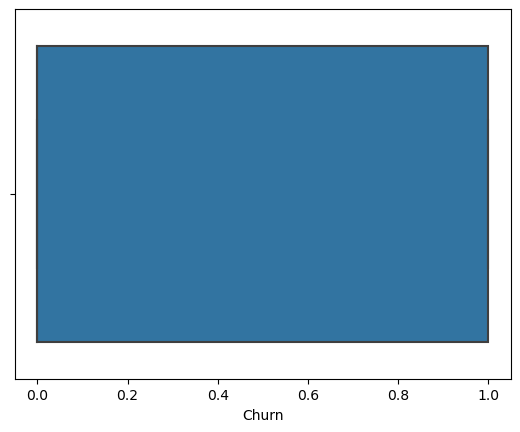

In [27]:
for col in columns:
    plt.figure()
    sns.boxplot(data=data,x=col)
    

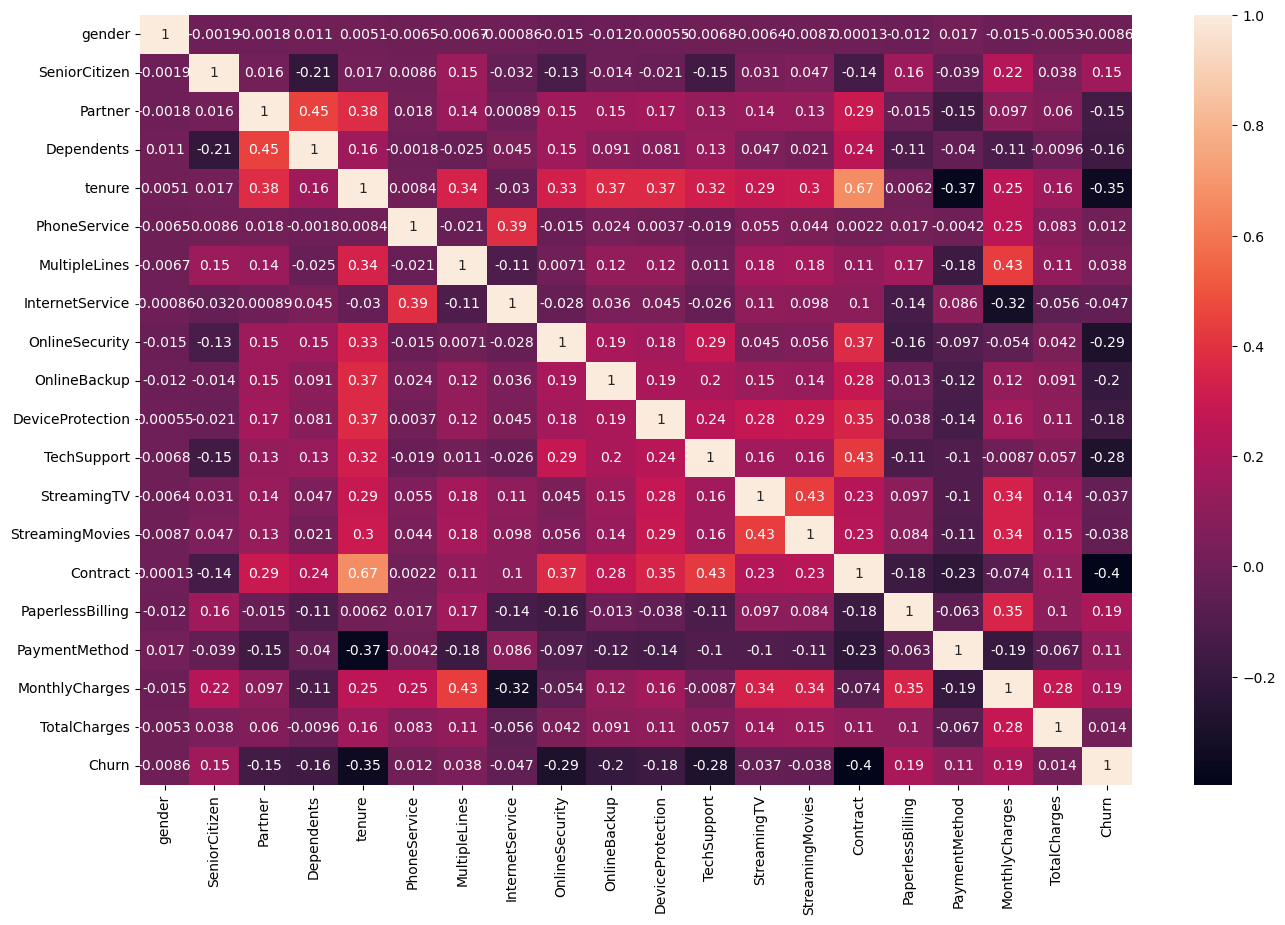

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [29]:
x=data.drop(columns=["Churn","customerID"],axis=1)
y=data["Churn"]

In [30]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-0.398608
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,-0.948762
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.641883
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,-0.983710
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.235224


In [31]:
x.shape

(7043, 19)

In [32]:
y.shape

(7043,)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
x.shape,x_train.shape,x_test.shape

((7043, 19), (5634, 19), (1409, 19))

In [36]:
y.shape,y_train.shape,y_test.shape

((7043,), (5634,), (1409,))

In [37]:
from sklearn.linear_model import LogisticRegression as LR

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [39]:
linear_model1=LR()

In [40]:
linear_model1.fit(x_train,y_train)

C:\Users\91821\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
random_forest=RFC(n_estimators = 20)

In [63]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [43]:
from sklearn.metrics import accuracy_score as AS,confusion_matrix as CM,classification_report as CR

In [44]:
y_pred=linear_model1.predict(x_test)

In [45]:
score=AS(y_test,y_pred)
score

0.8161816891412349

In [46]:
confusion=CM(y_test,y_pred)
confusion

array([[940,  96],
       [163, 210]], dtype=int64)

<AxesSubplot:>

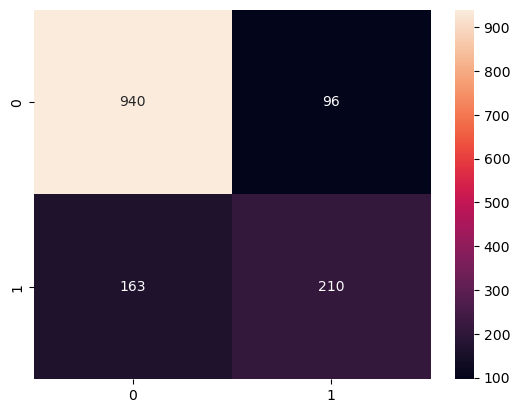

In [47]:
sns.heatmap(confusion,annot=True,fmt="d")

In [48]:
classification=CR(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [64]:
y_pred_forest=random_forest.predict(x_test)

In [65]:
score_rfc=AS(y_test,y_pred_forest)
score_rfc

0.7955997161107168

In [66]:
confusion_rfc=CM(y_test,y_pred_forest)
confusion_rfc

array([[948,  88],
       [200, 173]], dtype=int64)

<AxesSubplot:>

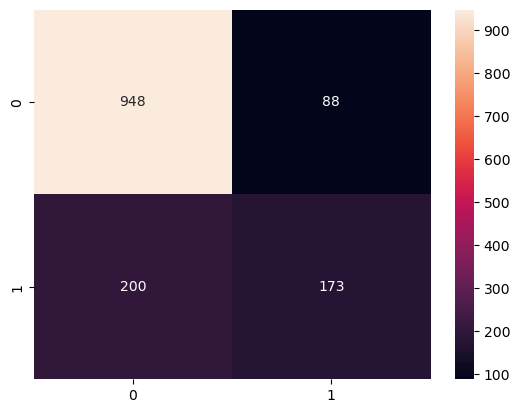

In [67]:
sns.heatmap(confusion_rfc,annot=True,fmt="d")

In [68]:
classification_rfc=CR(y_test,y_pred_forest)
print(classification_rfc)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [54]:
# based on the results the model which appears to be better is logistic regression model

# based on the results the model which appears to be better is logistic regression model 
# now we can see that performance of both the model is low in prediction of class "1" that is because it only has 373 instances for prediction

In [57]:
x.values

array([[  0.        ,   0.        ,   1.        , ...,   2.        ,
         29.85      ,  -0.39860759],
       [  1.        ,   0.        ,   0.        , ...,   3.        ,
         56.95      ,  -0.94876238],
       [  1.        ,   0.        ,   0.        , ...,   3.        ,
         53.85      ,  -1.64188328],
       ...,
       [  0.        ,   0.        ,   1.        , ...,   2.        ,
         29.6       ,  -0.13968008],
       [  1.        ,   1.        ,   1.        , ...,   3.        ,
         74.4       ,  -0.31653445],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        105.65      ,   1.13801338]])

In [58]:
y.ravel()

array([0, 0, 1, ..., 0, 1, 0])

In [56]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [59]:
x_sm,y_sm=sm.fit_resample(x.values,y.ravel())

In [60]:
print(sum(y==1))
print(sum(y==0))

1869
5174


In [61]:
print(sum(y_sm==1))
print(sum(y_sm==0))

5174
5174


In [69]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [72]:
linear_model2=LR()

In [73]:
linear_model2.fit(x_sm_train,y_sm_train)

C:\Users\91821\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred_lsm=linear_model2.predict(x_sm_test)
score2_lsm=AS(y_sm_test,y_pred_lsm)
score2_lsm

0.7855072463768116

In [76]:
confusion_lsm=CM(y_sm_test,y_pred_lsm)
confusion_lsm

array([[765, 256],
       [188, 861]], dtype=int64)

In [78]:
classification_lsm=CR(y_sm_test,y_pred_lsm)
print(classification_lsm)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1021
           1       0.77      0.82      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

